#### Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [48]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import plotting_extent
from natsort import natsorted
import numpy as np
import earthpy.spatial as es
import pandas as pd
import geopandas
import rasterio
import pycrs
import os

file_dir=r'C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/concept proof'

#### Read in environmental data
-read in the ENVIREM and BIOCLIM raster files containing the environmental data<br>
-inspect the raster files <br>

In [3]:
###Read in and inspect raster layers

#ENVIREM dataset
#create list of raster file locations and a list containing only the names of each raster
list_envirem_files=[]
names_envirem=[]

for root, dirs, files in os.walk(file_dir+"/data/GIS/5_deg"):
    for file in files:
        if file.endswith('.tif'):
            list_envirem_files.append(file_dir+"/data/GIS/5_deg/"+file)
            name=file.replace(".tif","")
            names_envirem.append(name)
            names_envirem=natsorted(names_envirem,key=lambda y: y.lower())
            
#read in the raster layers and print maps for inspection
#for name in names_envirem:
 #   raster=rasterio.open(file_dir+"/data/GIS/5_deg/"+name+".tif")
    #print(raster.meta) inspect meta information
  #  show(raster,title="ENVIREM %s"%name)
    
#BIOCLIM dataset
#create list of raster file locations and a list containing only the names of each raster
list_bioclim_files=[]
names_bioclim=[]

for root, dirs, files in os.walk(file_dir+"/data/GIS/wc5"):
    for file in files:
        if file.endswith('.tif'):
            list_bioclim_files.append(file_dir+"/data/GIS/wc5/"+file)
            name=file.replace(".tif","")
            names_bioclim.append(name)
            names_bioclim=natsorted(names_bioclim,key=lambda y: y.lower())


#read in the raster layers and print maps for inspection
#for name in names_bioclim:
 #   raster=rasterio.open(file_dir+"/data/GIS/wc5/"+name+".tif") 
    #print(raster.meta) inspect meta information
  #  show(raster, title="Bioclim %s"%name)

In [47]:
for file in list_bioclim_files:
    file=file.replace(".tif","_2.tif")
    with rasterio.open(file) as raster:
        band=raster.read(1)
        minb=np.min(band)
        minb
        raster.profile

C:\Users\Mark.Rademaker\PycharmProjects\InternshipNaturalis\venv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\Mark.Rademaker\PycharmProjects\InternshipNaturalis\venv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

nan

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4320, 'height': 1800, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0), 'tiled': False, 'interleave': 'band'}

['C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/concept proof/data/GIS/wc5/bio1.tif',
 'C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/concept proof/data/GIS/wc5/bio10.tif',
 'C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/concept proof/data/GIS/wc5/bio11.tif',
 'C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/concept proof/data/GIS/wc5/bio12.tif',
 'C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/concept proof/data/GIS/wc5/bio13.tif',
 'C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/concept proof/data/GIS/wc5/bio14.tif',
 'C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/concept proof/data/GIS/wc5/bio15.tif',
 'C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/trait-geo-diverse-dl/concept proof/data/GIS/wc5/bio16.tif',
 'C:/Users/Mark.Rademaker

#### Stack the raster files
The raster files can now be stacked to create a single raster file. <br> The output files (as well as the clipped outputs later) will be too large to store on github. Therefore they are stored in a different path

In [49]:
###Stack raster layers into single dataset

#Stack ENVIREM dataset
es.stack(list_envirem_files, file_dir+'/data/GIS/env_stacked/ENVIREM_stacked.tif')
#these stacked files are too large to put on github, so save them to another directory

#Stack BIOCLIM dataset
es.stack(list_bioclim_files, file_dir+'/data/GIS/env_stacked/BIOCLIM_stacked.tif')
#these stacked files are too large to put on github, so save them to another directory

#Stack ENVIREM+BIOCLIM dataset
list_envirem_bioclim_files=[]
for item in list_envirem_files:
    list_envirem_bioclim_files.append(item)
for item in list_bioclim_files:
    list_envirem_bioclim_files.append(item)

names_envirem_bioclim=[]
for item in names_envirem:
    names_envirem_bioclim.append(item)
for item in names_bioclim:
    names_envirem_bioclim.append(item)

es.stack(list_envirem_bioclim_files, file_dir+'/data/GIS/env_stacked/ENVIREM_BIOCLIM_stacked.tif')
#these stacked files are too large to put on github, so save them to another directory

C:\Users\Mark.Rademaker\PycharmProjects\InternshipNaturalis\venv\lib\site-packages\earthpy\spatial.py:289: RuntimeWarning: invalid value encountered in greater
  bands = sources[ii].read()
C:\Users\Mark.Rademaker\PycharmProjects\InternshipNaturalis\venv\lib\site-packages\earthpy\spatial.py:289: RuntimeWarning: invalid value encountered in less
  bands = sources[ii].read()
C:\Users\Mark.Rademaker\PycharmProjects\InternshipNaturalis\venv\lib\site-packages\earthpy\spatial.py:236: RuntimeWarning: invalid value encountered in greater
  arr = src.read()
C:\Users\Mark.Rademaker\PycharmProjects\InternshipNaturalis\venv\lib\site-packages\earthpy\spatial.py:236: RuntimeWarning: invalid value encountered in less
  arr = src.read()


(masked_array(
   data=[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         ...,
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, n

(masked_array(
   data=[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         ...,
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, n

(masked_array(
   data=[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],
 
         ...,
 
         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, n

####  Extracting areas of interest from the raster maps based on occurrence data <br>
- first create a dictionary containing the species occurrences
- Then make a function creating a 1000km square buffer around each occurence point for each species<br>
- Afterwards clip the raster file to this buffer extend <br>
- And inspect the output

In [4]:
#access file with list of taxa names
taxa=pd.read_csv(file_dir+"/data/spec_filtered/taxa.txt",header=None)
taxa.columns=["taxon"]

In [5]:
#Create dictionary
species_occ_dict={}

for i in taxa["taxon"]:
    taxon_data = pd.read_csv(file_dir+"/data/spec_filtered/%s.csv"%i)
    #add species dataframe to dict
    species_occ_dict["%s"%i] = taxon_data  
    #check whether all species have been included and inspect dictionary
if len(species_occ_dict.keys())==len(taxa["taxon"]):
    print("All species dataframes now in dictionary")
else:
    print("Error: not all species dataframe included")

All species dataframes now in dictionary


In [ ]:
#Create environmental raster clip for each species
for key in species_occ_dict:    
    #load occurrence data and set initial projection
    data=species_occ_dict[key]
    spec = data["taxon_name"][0]
    spec = spec.replace(" ","_")
    data['coordinates'] = list(zip(data["decimal_longitude"], data["decimal_latitude"]))
    data['coordinates'] = data["coordinates"].apply(Point)
    geo_data=geopandas.GeoDataFrame(data, geometry='coordinates',crs={'init' :'epsg:4326'})
    
    #change projection to azimuthal equidistant to calculate 1000km buffer around point
    geo_data = geo_data.to_crs({'init': 'esri:54032'}) 
    buffer=geo_data.buffer(1000*1000)
    buffer=buffer.to_crs(epsg=4326)
    
    #create single large polygon from individual buffers
    union_buffer=buffer.unary_union
    
    #open raster map to be clipped to polygon extent
    raster=rasterio.open(file_dir+'/data/GIS/env_stacked/ENVIREM_BIOCLIM_stacked.tif')
    #show(raster)

    #specify output tif:
    out_tif = file_dir+'/data/GIS/spec_stacked_raster_clip/%s_raster_clip.tif'%spec

    #clip the raster:
    out_img, out_transform = mask(dataset=raster, shapes=[union_buffer],crop=True)

    # Copy the metadata
    out_meta = raster.meta.copy()

    # Parse EPSG code
    epsg_code = int(raster.crs.data['init'][5:])
    out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})
    #save the clipped raster
    with rasterio.open(out_tif, "w", **out_meta) as dest:
        dest.write(out_img)
    print("species %s processed"%spec)

Inspect the first band of the clipped raster for all species

In [ ]:
#Inspect the first band of the clipped raster for all species
for key in species_occ_dict:
    ##### Extract occurrence point to plot on the raster (see if correct area was clipped)
    data=species_occ_dict[key]
    spec = data["taxon_name"][0]
    spec = spec.replace(" ","_")
    data['coordinates'] = list(zip(data["decimal_longitude"], data["decimal_latitude"]))
    data['coordinates'] = data["coordinates"].apply(Point)
    geo_data=geopandas.GeoDataFrame(data, geometry='coordinates',crs={'init' :'epsg:4326'})
    ####open the clipped raster
    clipped = rasterio.open(file_dir+'/data/GIS/spec_stacked_raster_clip/%s_raster_clip.tif'%spec)
    array = clipped.read(1)
    array_data = clipped.read(1,masked=True)
    array_meta = clipped.profile
   
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(array_data,cmap="gray",interpolation="none",vmin=0,
    # Here you must set the spatial extent or else the data will not line up with your geopandas layer
    extent=plotting_extent(clipped),)
    spec_plots_points=geo_data["coordinates"]
    spec_plots_points.plot(ax=ax,
                       marker='o',
                       markersize=20,
                       color='orange')
    ax.set_title("%s \n Raster clip and occurrence points"%spec,
             fontsize=20)
    plt.show()
#Works!

Inspect all 41 bands for a single species

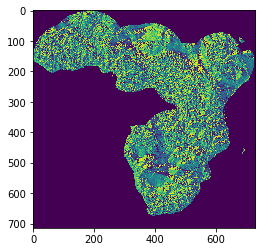

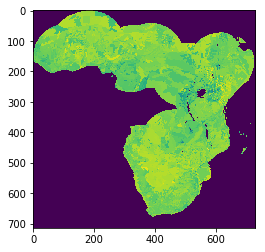

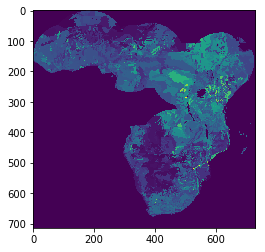

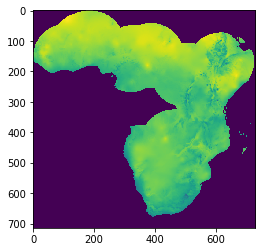

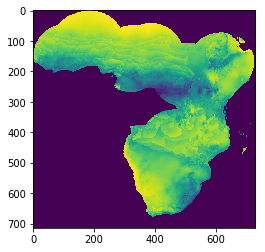

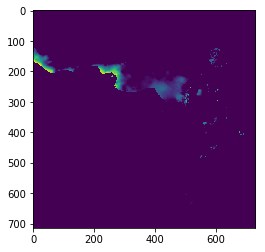

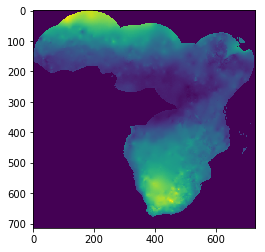

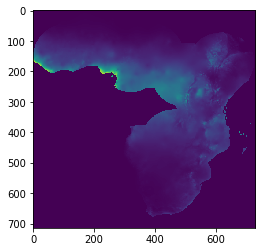

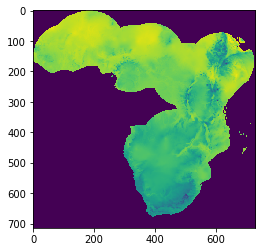

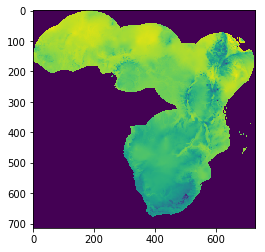

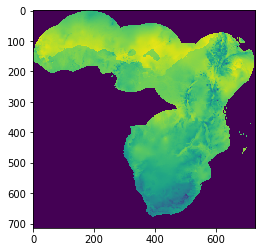

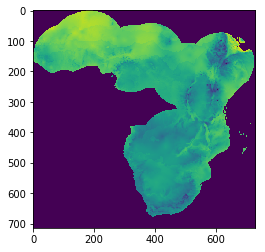

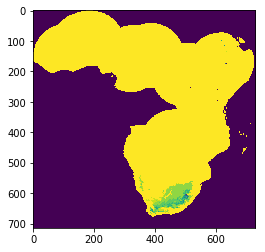

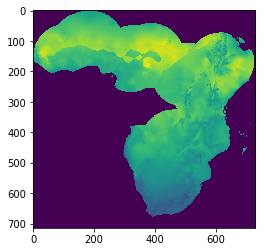

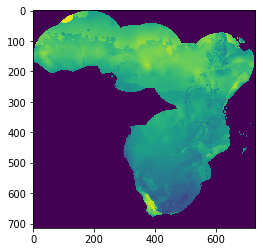

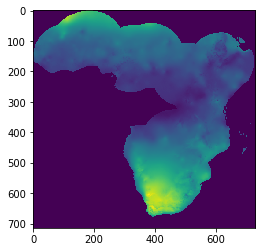

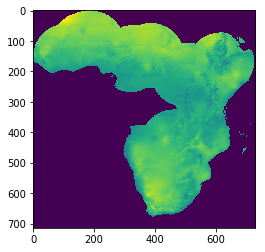

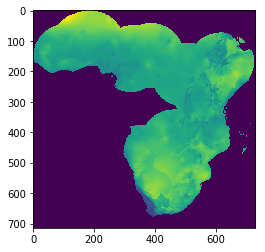

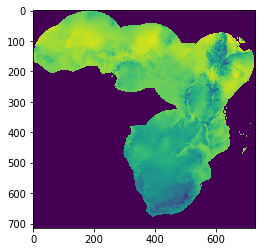

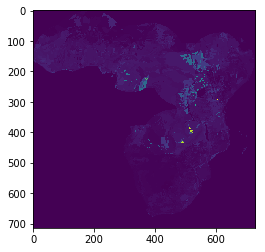

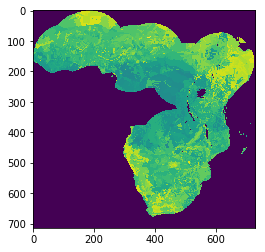

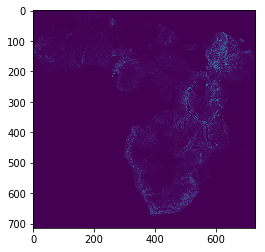

KeyboardInterrupt: 

In [7]:
#Inspect all bands of the clipped raster for a single species
data=species_occ_dict["Alcelaphus_buselaphus"]
spec = data["taxon_name"][0]
spec =spec.replace(" ","_")
clipped = rasterio.open(file_dir+"/data/GIS/spec_stacked_raster_clip/%s_raster_clip.tif"%spec)
for i in range(1,42):
    array = clipped.read(i)
    plt.imshow(array,interpolation='none', vmin=0)
    plt.show()
#Works!